In [1]:
from igraph import *
import cairo
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import csv
from itertools import groupby

from utils import GraphWrapper

%load_ext autoreload
%autoreload 2

## Basic info

In [2]:
df = pd.read_csv('processed/result.csv')
df.head()

,host,target
0,RNF170,TMA16
1,RNF170,SLC1A1
2,RNF170,CAPN15
3,RNF170,RCOR1
4,RNF170,PIK3C2B


In [3]:
miRNA_data = GraphWrapper(graph_df=df)

In [4]:
miRNA_data.graph.summary()

'IGRAPH DN-- 14187 224436 -- \n+ attr: label (v), name (v)'

In [5]:
miRNA_data.graph.diameter()

9

## Degree hist

(array([8.239e+03, 2.875e+03, 1.438e+03, 8.110e+02, 4.200e+02, 1.940e+02,
        9.700e+01, 4.900e+01, 2.800e+01, 1.600e+01, 9.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00]),
 array([  0.        ,  12.66666667,  25.33333333,  38.        ,
         50.66666667,  63.33333333,  76.        ,  88.66666667,
        101.33333333, 114.        , 126.66666667, 139.33333333,
        152.        , 164.66666667, 177.33333333, 190.        ]),
 <a list of 15 Patch objects>)

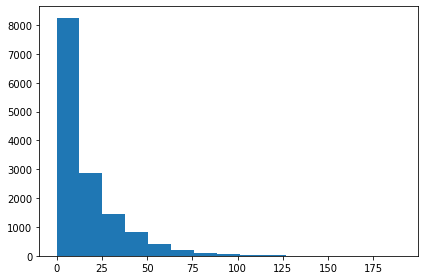

In [27]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(miRNA_data.graph.degree(mode="in"), bins=15)

(array([1.3781e+04, 2.4500e+02, 9.1000e+01, 3.5000e+01, 1.9000e+01,
        5.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  193.2,  386.4,  579.6,  772.8,  966. , 1159.2, 1352.4,
        1545.6, 1738.8, 1932. , 2125.2, 2318.4, 2511.6, 2704.8, 2898. ]),
 <a list of 15 Patch objects>)

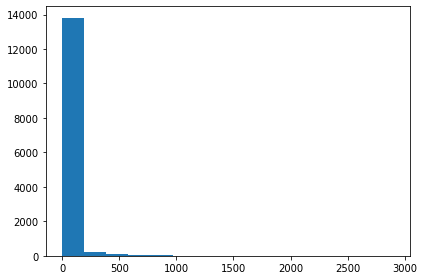

In [26]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(miRNA_data.graph.degree(mode="out"), bins=15)

## Top 3 by degree

In [29]:
topList = sorted([[ind, val] for ind, val in enumerate(miRNA_data.graph.degree())], key=lambda x: x[1], reverse=True)[:3]
list(map(lambda node: miRNA_data.graph.vs[node[0]].degree(), topList))

[2898, 2246, 2072]

## Top 3 by IN degree

In [30]:
topList = sorted([[ind, val] for ind, val in enumerate(miRNA_data.graph.degree(mode="in"))], key=lambda x: x[1], reverse=True)[:3]
list(map(lambda node: miRNA_data.graph.vs[node[0]].degree(mode="in"), topList))

[190, 189, 180]

## Top 3 by OUT degree

In [31]:
topList = sorted([[ind, val] for ind, val in enumerate(miRNA_data.graph.degree(mode="out"))], key=lambda x: x[1], reverse=True)[:3]
list(map(lambda node: miRNA_data.graph.vs[node[0]].degree(mode="out"), topList))

[2898, 2224, 2035]

# Data for patients

In [5]:
data = pd.read_csv('processed/good.csv')
print(data.shape)
data.head()

(15554, 1044)


,UNIT_ID,UnitName,EntrezID,GeneSymbol,GSM441627,GSM441628,GSM441629,GSM441643,GSM441644,GSM441657,...,GSM79360,GSM79353,GSM79153,GSM79349,GSM79355,GSM79181,GSM79323,GSM79214,GSM79350,GSM79211
0,25,AFFX-HUMISGF3A/M97935_MA_at,6772,STAT1,258.604,271.703,143.8760,96.2013,211.158,245.954,...,260.148,103.5360,174.966,191.4550,121.6530,122.4570,129.9380,178.902,251.261,103.5830
1,26,AFFX-HUMISGF3A/M97935_MB_at,6772,STAT1,114.433,148.662,81.2455,58.1097,135.255,169.862,...,214.424,45.7677,104.428,78.0305,58.6785,65.1835,76.1533,125.455,144.751,57.6514
2,27,AFFX-HUMISGF3A/M97935_3_at,6772,STAT1,609.059,562.069,349.9580,191.2970,879.009,771.731,...,1205.720,143.9720,789.292,1128.1100,287.0620,334.0280,386.8000,652.239,1164.150,269.3320
3,31,AFFX-HUMGAPDH/M33197_5_at,2597,GAPDH,4470.210,4570.150,2186.3100,4799.3800,6296.870,4864.770,...,2647.440,2678.1600,1562.820,1009.7900,4489.6300,2030.0600,2990.5000,2602.680,1699.050,2332.6800
4,32,AFFX-HUMGAPDH/M33197_M_at,2597,GAPDH,5183.690,4677.370,2771.9800,5587.2800,7326.030,5456.950,...,3957.630,4781.1200,2632.850,2252.8800,6344.9700,3244.9100,4166.8100,3619.780,2916.770,4011.9500


In [7]:
data2 = pd.read_csv('processed/total.csv', names=["Person", "Status"])
print(data2.shape)
data2.head()

(1040, 2)


,Person,Status
0,GSM441627,TooLate0
1,GSM441628,relapse
2,GSM441629,relapse
3,GSM441643,relapse
4,GSM441644,relapse


In [8]:
data2['Status'].unique()

array(['TooLate0', 'relapse', 'no_relapse', 'TooEarly0', 'TooLate1',
       'test1relapse', 'TooEarly1', 'test1no_relapse', 'test2relapse',
       'TooLate2', 'test2no_relapse', 'TooEarly2', 'NewTest1_Relapse',
       'NewTest1_NoRelapse', 'TooLate3', 'TooEarly3', 'NewTest2_Relapse',
       'NewTest2_NoRelapse', 'TooLate4', 'TooEarly4'], dtype=object)

## Strong connected components analysis

In [6]:
summary(miRNA_data.graph.components().cluster_graph())

IGRAPH D--- 13514 62702 -- 


In [7]:
# get graph of strong connected components
subgraphs = miRNA_data.graph.components().subgraphs()

# subgraphs ordered by vertex count
ordered_subgraphs= sorted(subgraphs, key=lambda subgraph: subgraph.vcount(), reverse=True)

# the only non trivial cluster
cluster = ordered_subgraphs[0]


In [8]:
cluster_data = GraphWrapper(graph=cluster)
cluster_data.graph.diameter()

8

In [9]:
cluster_data.graph.summary()

'IGRAPH DN-- 674 10175 -- \n+ attr: label (v), name (v)'

In [37]:
print(len(cluster_data.get_knet(1)))

179


In [38]:
print(len(cluster_data.get_knet(2)))

55


In [39]:
print(len(cluster_data.get_knet(3)))

16


In [40]:
print(len(cluster_data.get_knet(4)))

3


In [41]:
print(len(cluster_data.get_knet(5)))

2


In [47]:
print(len(cluster_data.get_knet(7)))

2


In [44]:
print(len(cluster_data.get_knet(8)))

2


In [45]:
cluster_data.graph.vcount()

674